In [2]:
import matplotlib.pyplot as plt
# from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, TimeDistributed, Input, MaxPooling1D
# from keras import backend as K
from loader_corrected import create_dataset, denormalize_3d

import tensorflow as tf


In [3]:
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))


In [4]:
X_train, X_test, y_train, y_test = create_dataset(input_hours=12, output_hours=3)

In [5]:
# Build the LSTM model,
# Building the LSTM model with two LSTM layers and two Dense layers.

# Initializes a linear stack of layers in the model. In a Sequential model, each layer has exact one input tensor and one output tensor.
model = Sequential()

model.add(
  Input(shape=(720, 8))
)

model.add(
    LSTM(50, return_sequences=True)
)

model.add(
    LSTM(50, return_sequences=True)
)

model.add(MaxPooling1D(pool_size=4))

model.add(
    LSTM(50, return_sequences=True)
)

model.add(
    LSTM(180, return_sequences=True)
)

model.add(Dropout(0.1))


model.add(TimeDistributed(Dense(8, activation="relu")))  # Output layer with 1 neuron to predict the closing price.

# Compile the model,
# Compile the model using Adam optimizer and mean squared error as the loss function.
learn_rate = 0.001
# optimizer = tf.keras.optimizers.Adam(learning_rate=learn_rate)
optimizer = tf.keras.optimizers.Lion(learning_rate=learn_rate)
# optimizer = tf.keras.optimizers.Adafactor(learning_rate=learn_rate)

model.compile(
    optimizer=optimizer,
    loss="mean_squared_error",
    metrics=["mean_absolute_error", "mean_squared_error", rmse],
)


# Train the model
num_epochs = 10
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=num_epochs,
    batch_size=64,
    verbose=1,
)

# Predicting and inverse transformation to original prices
# Predicting and transforming predictions back to original scale.
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = denormalize_3d(train_predict)
test_predict = denormalize_3d(test_predict)

I0000 00:00:1734156456.571220  373957 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1734156457.959203  373957 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1734156457.959361  373957 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1734156457.962331  373957 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1734156457.962458  373957 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Epoch 1/10


2024-12-14 01:08:55.852581: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


151/151 ━━━━━━━━━━━━━━━━━━━━ 48s 182ms/step - loss: 0.0754 - mean_absolute_error: 0.2015 - mean_squared_error: 0.0754 - rmse: 0.2555 - val_loss: 0.0325 - val_mean_absolute_error: 0.1354 - val_mean_squared_error: 0.0325 - val_rmse: 0.1799
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 23s 154ms/step - loss: 0.0314 - mean_absolute_error: 0.1350 - mean_squared_error: 0.0314 - rmse: 0.1769 - val_loss: 0.0259 - val_mean_absolute_error: 0.1194 - val_mean_squared_error: 0.0259 - val_rmse: 0.1606
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 22s 147ms/step - loss: 0.0266 - mean_absolute_error: 0.1226 - mean_squared_error: 0.0266 - rmse: 0.1628 - val_loss: 0.0184 - val_mean_absolute_error: 0.1025 - val_mean_squared_error: 0.0184 - val_rmse: 0.1356
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 24s 159ms/step - loss: 0.0215 - mean_absolute_error: 0.1077 - mean_squared_error: 0.0215 - rmse: 0.1450 - val_loss: 0.0225 - val_mean_absolute_error: 0.1159 - val_mean_squared_error: 0.0225 - val_rmse: 0.1499
Epoch 5/10
151/

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 720, 50)        │        11,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 720, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 180, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 180, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 180, 180)       │       166,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 180, 180)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 180, 8)         │         1,448 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 439,938 (1.68 MB)

 Trainable params: 219,968 (859.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 219,970 (859.26 KB)

In [7]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error', 'rmse', 'val_loss', 'val_mean_absolute_error', 'val_mean_squared_error', 'val_rmse'])

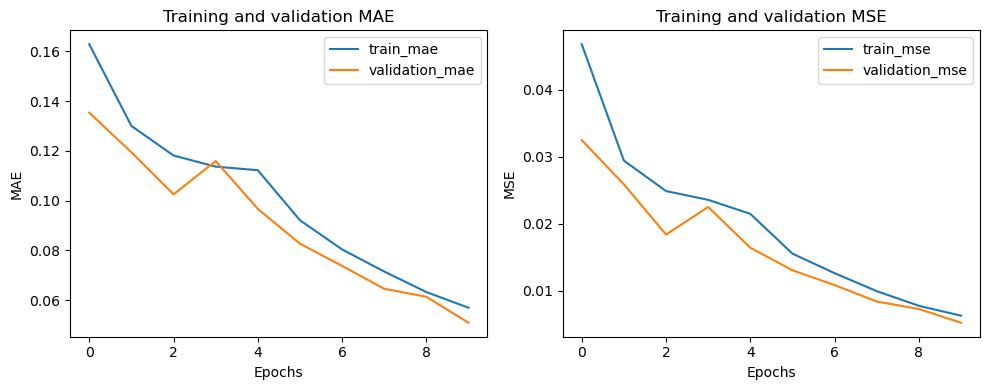

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot training & validation MAE values
ax1.plot(
    range(num_epochs), history.history["mean_absolute_error"], label="train_mae"
)
ax1.plot(
    range(num_epochs),
    history.history["val_mean_absolute_error"],
    label="validation_mae",
)
ax1.set_title("Training and validation MAE")
ax1.set_ylabel("MAE")
ax1.set_xlabel("Epochs")
ax1.legend()

# Plot training & validation MSE values
ax2.plot(
    range(num_epochs), history.history["mean_squared_error"], label="train_mse"
)
ax2.plot(
    range(num_epochs),
    history.history["val_mean_squared_error"],
    label="validation_mse",
)
ax2.set_title("Training and validation MSE")
ax2.set_ylabel("MSE")
ax2.set_xlabel("Epochs")
ax2.legend()

fig.tight_layout()
plt.show()

In [9]:
fig.savefig(f"numEpochs_{num_epochs}-learningRate_{learn_rate}.png")